Training Logistic Regression via Stochastic Gradient Ascent

Fire up Turi Create

In [ ]:
pip install turicreate

In [ ]:
from __future__ import division
import turicreate



Load and process review dataset

In [ ]:
products = turicreate.SFrame('/content/drive/My Drive/amazon_baby_subset.sframe/')

In [ ]:
products

name,review,rating,sentiment
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1
Nature's Lullabies SecondYear Sticker Calendar ...,We wanted to getsomething to keep track ...,5.0,1
Nature's Lullabies SecondYear Sticker Calendar ...,My daughter had her 1stbaby over a year ago. ...,5.0,1
"Lamaze Peekaboo, I LoveYou ...","One of baby's first andfavorite books, and i ...",4.0,1
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,Very cute interactivebook! My son loves this ...,5.0,1
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,1
Hunnt&reg; FallingFlowers and Birds Kids ...,"Try this out for a springproject !Easy ,fun and ...",5.0,1
Blessed By Pope BenedictXVI Divine Mercy Full ...,very nice Divine MercyPendant of Jesus now on ...,5.0,1
Cloth Diaper PinsStainless Steel ...,We bought the pins as my6 year old Autistic son ...,4.0,1
Cloth Diaper PinsStainless Steel ...,It has been many yearssince we needed diaper ...,5.0,1


Just like we did previously, we will work with a hand-curated list of important words extracted from the review data. We will also perform 2 simple data transformations:

Remove punctuation using Python's built-in string manipulation functionality.
Compute word counts (only for the important_words)
Refer to Module 3 assignment for more details.

In [ ]:
import string
import json
with open('/content/drive/My Drive/important_words.json', 'r') as f: 
    important_words = json.load(f)
important_words = [str(s) for s in important_words]

# Remove punctuation
def remove_punctuation(text):
    try: # python 2.x
        text = text.translate(None, string.punctuation) 
    except: # python 3.x
        translator = text.maketrans('', '',string.punctuation)
        text = text.translate(translator)
    return text

products['review_clean'] = products['review'].apply(remove_punctuation)

# Split out the words into individual columns
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s : s.split().count(word))

In [ ]:
products

name,review,rating,sentiment,review_clean,baby
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,1,All of my kids have criednonstop when I tried to ...,0
Nature's Lullabies SecondYear Sticker Calendar ...,We wanted to getsomething to keep track ...,5.0,1,We wanted to getsomething to keep track ...,0
Nature's Lullabies SecondYear Sticker Calendar ...,My daughter had her 1stbaby over a year ago. ...,5.0,1,My daughter had her 1stbaby over a year ago She ...,1
"Lamaze Peekaboo, I LoveYou ...","One of baby's first andfavorite books, and i ...",4.0,1,One of babys first andfavorite books and it is ...,0
SoftPlay Peek-A-BooWhere's Elmo A Childr ...,Very cute interactivebook! My son loves this ...,5.0,1,Very cute interactivebook My son loves this ...,0
Our Baby Girl Memory Book,"Beautiful book, I love itto record cherished t ...",5.0,1,Beautiful book I love itto record cherished t ...,0
Hunnt&reg; FallingFlowers and Birds Kids ...,"Try this out for a springproject !Easy ,fun and ...",5.0,1,Try this out for a springproject Easy fun and ...,0
Blessed By Pope BenedictXVI Divine Mercy Full ...,very nice Divine MercyPendant of Jesus now on ...,5.0,1,very nice Divine MercyPendant of Jesus now on ...,0
Cloth Diaper PinsStainless Steel ...,We bought the pins as my6 year old Autistic son ...,4.0,1,We bought the pins as my6 year old Autistic son ...,0
Cloth Diaper PinsStainless Steel ...,It has been many yearssince we needed diaper ...,5.0,1,It has been many yearssince we needed diaper ...,0


Split data into training and validation sets

In [ ]:
train_data, validation_data = products.random_split(.9, seed=1)

print('Training set  : %d data points' % len(train_data))
print('Validation set: %d data points' % len(validation_data))

Training set  : 47780 data points
Validation set: 5292 data points


Convert SFrame to NumPy array

In [ ]:
import numpy as np

def get_numpy_data(data_sframe, features, label):
    data_sframe['intercept'] = 1
    features = ['intercept'] + features
    features_sframe = data_sframe[features]
    feature_matrix = features_sframe.to_numpy()
    label_sarray = data_sframe[label]
    label_array = label_sarray.to_numpy()
    return(feature_matrix, label_array)

In [ ]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

Building on logistic regression

In [ ]:
'''
produces probablistic estimate for P(y_i = +1 | x_i, w).
estimate ranges between 0 and 1.
'''
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    predictions = 1. / (1.+np.exp(-score))    
    return predictions

Derivative of log likelihood with respect to a single coefficient

Let us now work on making minor changes to how the derivative computation is performed for logistic regression.

Recall from the lectures and Module 3 assignment that for logistic regression, the derivative of log likelihood with respect to a single coefficient is as follows:

∂
ℓ
∂
w
j
=
N
∑
i
=
1
 
h
j
(
x
i
)
(
1
[
y
i
=
+
1
]
−
P
(
y
i
=
+
1
|
x
i
,
w
)
)
 
In Module 3 assignment, we wrote a function to compute the derivative of log likelihood with respect to a single coefficient  
w
j
 . The function accepts the following two parameters:

errors vector containing  
(
1
[
y
i
=
+
1
]
−
P
(
y
i
=
+
1
|
x
i
,
w
)
)
  for all  
i
 
feature vector containing  
h
j
(
x
i
)
  for all  
i
 

Complete the following code block:

In [ ]:
def feature_derivative(errors, feature): 
    
    # Compute the dot product of errors and feature
    
    derivative = np.dot(errors,feature)

    return derivative

To verify the correctness of the gradient computation, we provide a function for computing average log likelihood (which we recall from the last assignment was a topic detailed in an advanced optional video, and used here for its numerical stability).

To track the performance of stochastic gradient ascent, we provide a function for computing average log likelihood.

ℓ
ℓ
A
(
w
)
=
1
N
N
∑
i
=
1
 
(
(
1
[
y
i
=
+
1
]
−
1
)
w
T
h
(
x
i
)
−
ln
(
1
+
exp
(
−
w
T
h
(
x
i
)
)
)
)
 

Note that we made one tiny modification to the log likelihood function (called compute_log_likelihood) in our earlier assignments. We added a  
1
/
N
  term which averages the log likelihood accross all data points. The  
1
/
N
  term makes it easier for us to compare stochastic gradient ascent with batch gradient ascent. We will use this function to generate plots that are similar to those you saw in the lecture.

In [ ]:
def compute_avg_log_likelihood(feature_matrix, sentiment, coefficients):
    
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    logexp = np.log(1. + np.exp(-scores))
    
    # Simple check to prevent overflow
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]
    
    lp = np.sum((indicator-1)*scores - logexp)/len(feature_matrix)
    
    return lp

Modifying the derivative for stochastic gradient ascent
Recall from the lecture that the gradient for a single data point  
x
i
  can be computed using the following formula:

∂
ℓ
i
(
w
)
∂
w
j
=
h
j
(
x
i
)
(
1
[
y
i
=
+
1
]
−
P
(
y
i
=
+
1
|
x
i
,
w
)
)
 
Computing the gradient for a single data point

Do we really need to re-write all our code to modify  
∂
ℓ
(
w
)
/
∂
w
j
  to  
∂
ℓ
i
(
w
)
/
∂
w
j
 ?

Thankfully No!. Using NumPy, we access  
x
i
  in the training data using feature_matrix_train[i:i+1,:] and  
y
i
  in the training data using sentiment_train[i:i+1]. We can compute  
∂
ℓ
i
(
w
)
/
∂
w
j
  by re-using all the code written in feature_derivative and predict_probability.

We compute  
∂
ℓ
i
(
w
)
/
∂
w
j
  using the following steps:

First, compute  
P
(
y
i
=
+
1
|
x
i
,
w
)
  using the predict_probability function with feature_matrix_train[i:i+1,:] as the first parameter.
Next, compute  
1
[
y
i
=
+
1
]
  using sentiment_train[i:i+1].
Finally, call the feature_derivative function with feature_matrix_train[i:i+1, j] as one of the parameters.
Let us follow these steps for j = 1 and i = 10:

In [ ]:
j = 1                        # Feature number
i = 10                       # Data point number
coefficients = np.zeros(194) # A point w at which we are computing the gradient.

predictions = predict_probability(feature_matrix_train[i:i+1,:], coefficients)
indicator = (sentiment_train[i:i+1]==+1)

errors = indicator - predictions        
gradient_single_data_point = feature_derivative(errors, feature_matrix_train[i:i+1,j])
print("Gradient single data point: %s" % gradient_single_data_point)
print("           --> Should print 0.0")

Gradient single data point: 0.0
           --> Should print 0.0


Modifying the derivative for using a batch of data points

In [ ]:
j = 1                        # Feature number
i = 10                       # Data point start
B = 10                       # Mini-batch size
coefficients = np.zeros(194) # A point w at which we are computing the gradient.

predictions = predict_probability(feature_matrix_train[i:i+B,:], coefficients)
indicator = (sentiment_train[i:i+B]==+1)

errors = indicator - predictions        
gradient_mini_batch = feature_derivative(errors, feature_matrix_train[i:i+B,j])
print("Gradient mini-batch data points: %s" % gradient_mini_batch)
print("                --> Should print 1.0")

Gradient mini-batch data points: 1.0
                --> Should print 1.0


Averaging the gradient across a batch
It is a common practice to normalize the gradient update rule by the batch size B:

∂
ℓ
A
(
w
)
∂
w
j
≈
1
B
i
+
B
∑
s
=
i
 
h
j
(
x
s
)
(
1
[
y
s
=
+
1
]
−
P
(
y
s
=
+
1
|
x
s
,
w
)
)
 
In other words, we update the coefficients using the average gradient over data points (instead of using a summation). By using the average gradient, we ensure that the magnitude of the gradient is approximately the same for all batch sizes. This way, we can more easily compare various batch sizes of stochastic gradient ascent (including a batch size of all the data points), and study the effect of batch size on the algorithm as well as the choice of step size.

Implementing stochastic gradient ascent
Now we are ready to implement our own logistic regression with stochastic gradient ascent. Complete the following function to fit a logistic regression model using gradient ascent:

In [ ]:
from math import sqrt
def logistic_regression_SG(feature_matrix, sentiment, initial_coefficients, step_size, batch_size, max_iter):
    log_likelihood_all = []
    
    # make sure it's a numpy array
    coefficients = np.array(initial_coefficients)
    # set seed=1 to produce consistent results
    np.random.seed(seed=1)
    # Shuffle the data before starting
    permutation = np.random.permutation(len(feature_matrix))
    feature_matrix = feature_matrix[permutation,:]
    sentiment = sentiment[permutation]
    
    i = 0 # index of current batch
    # Do a linear scan over data
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        # Make sure to slice the i-th row of feature_matrix with [i:i+batch_size,:]
        predictions = predict_probability(feature_matrix[i:i+batch_size,:],coefficients)
        
        # Compute indicator value for (y_i = +1)
        # Make sure to slice the i-th entry with [i:i+batch_size]
        indicator = (sentiment[i:i+batch_size] == +1)
        
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        
        for j in range(len(coefficients)): # loop over each coefficient
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j]
            # Compute the derivative for coefficients[j] and save it to derivative.
            # Make sure to slice the i-th row of feature_matrix with [i:i+batch_size,j]
            derivative = feature_derivative(errors,feature_matrix[i:i+batch_size,j])
            
            
            # compute the product of the step size, the derivative, and the **normalization constant** (1./batch_size)
           
            coefficients[j] += (step_size*derivative)/batch_size
        
        # Checking whether log likelihood is increasing
        # Print the log likelihood over the *current batch*
        lp = compute_avg_log_likelihood(feature_matrix[i:i+batch_size,:], sentiment[i:i+batch_size],
                                        coefficients)
        log_likelihood_all.append(lp)
        if itr <= 15 or (itr <= 1000 and itr % 100 == 0) or (itr <= 10000 and itr % 1000 == 0) \
         or itr % 10000 == 0 or itr == max_iter-1:
            data_size = len(feature_matrix)
            print('Iteration %*d: Average log likelihood (of data points in batch [%0*d:%0*d]) = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, \
                 int(np.ceil(np.log10(data_size))), i, \
                 int(np.ceil(np.log10(data_size))), i+batch_size, lp))
        
        # if we made a complete pass over data, shuffle and restart
        i += batch_size
        if i+batch_size > len(feature_matrix):
            permutation = np.random.permutation(len(feature_matrix))
            feature_matrix = feature_matrix[permutation,:]
            sentiment = sentiment[permutation]
            i = 0
                
    # We return the list of log likelihoods for plotting purposes.
    return coefficients, log_likelihood_all

In [ ]:
sample_feature_matrix = np.array([[1.,2.,-1.], [1.,0.,1.]])
sample_sentiment = np.array([+1, -1])

coefficients, log_likelihood = logistic_regression_SG(sample_feature_matrix, sample_sentiment, np.zeros(3),
                                                  step_size=1., batch_size=2, max_iter=2)
print('-------------------------------------------------------------------------------------')
print('Coefficients learned                 :', coefficients)
print('Average log likelihood per-iteration :', log_likelihood)
if np.allclose(coefficients, np.array([-0.09755757,  0.68242552, -0.7799831]), atol=1e-3) and np.allclose(log_likelihood, np.array([-0.33774513108142956, -0.2345530939410341])):
    # pass if elements match within 1e-3
    print('-------------------------------------------------------------------------------------')
    print('Test passed!')
else:
    print('-------------------------------------------------------------------------------------')
    print('Test failed')

Iteration 0: Average log likelihood (of data points in batch [0:2]) = -0.33774513
Iteration 1: Average log likelihood (of data points in batch [0:2]) = -0.23455309
-------------------------------------------------------------------------------------
Coefficients learned                 : [-0.09755757  0.68242552 -0.7799831 ]
Average log likelihood per-iteration : [-0.33774513108142956, -0.2345530939410341]
-------------------------------------------------------------------------------------
Test passed!


Compare convergence behavior of stochastic gradient ascent

Running gradient ascent using the stochastic gradient ascent implementation

In [ ]:
coefficients, log_likelihood = logistic_regression_SG(feature_matrix_train, sentiment_train,
                                        initial_coefficients=np.zeros(194),
                                        step_size=5e-1, batch_size=1, max_iter=10)

Iteration 0: Average log likelihood (of data points in batch [00000:00001]) = -0.25192908
Iteration 1: Average log likelihood (of data points in batch [00001:00002]) = -0.00000001
Iteration 2: Average log likelihood (of data points in batch [00002:00003]) = -0.12692771
Iteration 3: Average log likelihood (of data points in batch [00003:00004]) = -0.02969101
Iteration 4: Average log likelihood (of data points in batch [00004:00005]) = -0.02668819
Iteration 5: Average log likelihood (of data points in batch [00005:00006]) = -0.04332901
Iteration 6: Average log likelihood (of data points in batch [00006:00007]) = -0.02368802
Iteration 7: Average log likelihood (of data points in batch [00007:00008]) = -0.12686897
Iteration 8: Average log likelihood (of data points in batch [00008:00009]) = -0.04468879
Iteration 9: Average log likelihood (of data points in batch [00009:00010]) = -0.00000124


In [ ]:
log_likelihood

[-0.25192908134537295,
 -8.5024389389541e-09,
 -0.12692771260639515,
 -0.029691014785741033,
 -0.026688191711023244,
 -0.04332900876420492,
 -0.02368801782547734,
 -0.12686897415874332,
 -0.044688785447222955,
 -1.2350307603270494e-06]

In [ ]:
coefficients_batch, log_likelihood_batch = logistic_regression_SG(feature_matrix_train, sentiment_train,
                                        initial_coefficients=np.zeros(194),
                                        step_size=5e-1, batch_size=len(feature_matrix_train), max_iter=200)

Iteration   0: Average log likelihood (of data points in batch [00000:47780]) = -0.68308119
Iteration   1: Average log likelihood (of data points in batch [00000:47780]) = -0.67394599
Iteration   2: Average log likelihood (of data points in batch [00000:47780]) = -0.66555129
Iteration   3: Average log likelihood (of data points in batch [00000:47780]) = -0.65779626
Iteration   4: Average log likelihood (of data points in batch [00000:47780]) = -0.65060701
Iteration   5: Average log likelihood (of data points in batch [00000:47780]) = -0.64392241
Iteration   6: Average log likelihood (of data points in batch [00000:47780]) = -0.63769009
Iteration   7: Average log likelihood (of data points in batch [00000:47780]) = -0.63186462
Iteration   8: Average log likelihood (of data points in batch [00000:47780]) = -0.62640636
Iteration   9: Average log likelihood (of data points in batch [00000:47780]) = -0.62128063
Iteration  10: Average log likelihood (of data points in batch [00000:47780]) = 

In [ ]:
log_likelihood_batch

[-0.6830811890078895,
 -0.6739459880798633,
 -0.6655512906167012,
 -0.65779625861419,
 -0.6506070057710562,
 -0.6439224136787511,
 -0.6376900942490327,
 -0.6318646168993762,
 -0.6264063604844126,
 -0.6212806263359546,
 -0.6164569138382298,
 -0.6119083185361556,
 -0.6076110285105438,
 -0.6035439010399692,
 -0.5996881053316769,
 -0.5960268198666091,
 -0.5925449750686648,
 -0.5892290337341438,
 -0.5860668030398379,
 -0.583047273058756,
 -0.5801604776071844,
 -0.5773973739701536,
 -0.5747497386394526,
 -0.5722100766767582,
 -0.5697715427058792,
 -0.567427871859678,
 -0.5651733192724158,
 -0.5630026069277565,
 -0.5609108768549933,
 -0.5588936498180125,
 -0.5569467887685674,
 -0.5550664664419862,
 -0.5532491365630676,
 -0.5514915082055067,
 -0.5497905229121227,
 -0.5481433342373578,
 -0.5465472894195802,
 -0.5449999129299629,
 -0.5434988916782126,
 -0.5420420616840964,
 -0.5406273960482872,
 -0.539252994077186,
 -0.537917071434561,
 -0.536617951208539,
 -0.5353540557960541,
 -0.5341238995186

Make "passes" over the dataset

To make a fair comparison betweeen stochastic gradient ascent and batch gradient ascent, we measure the average log likelihood as a function of the number of passes (defined as follows):

[
# of passes
]
=
[
# of data points touched so far
]
[
size of dataset
]


Log likelihood plots for stochastic gradient ascent

In [ ]:
len(feature_matrix_train)

47780

In [ ]:
step_size = 1e-1
batch_size = 100
num_passes = 10
num_iterations = num_passes * int(len(feature_matrix_train)/batch_size)

coefficients_sgd, log_likelihood_sgd = logistic_regression_SG(feature_matrix_train, sentiment_train,
                                       initial_coefficients=np.zeros(194),
                                       step_size=1e-1, batch_size=100, max_iter=num_iterations)

Iteration    0: Average log likelihood (of data points in batch [00000:00100]) = -0.68251093
Iteration    1: Average log likelihood (of data points in batch [00100:00200]) = -0.67845294
Iteration    2: Average log likelihood (of data points in batch [00200:00300]) = -0.68207160
Iteration    3: Average log likelihood (of data points in batch [00300:00400]) = -0.67411325
Iteration    4: Average log likelihood (of data points in batch [00400:00500]) = -0.67804438
Iteration    5: Average log likelihood (of data points in batch [00500:00600]) = -0.67712546
Iteration    6: Average log likelihood (of data points in batch [00600:00700]) = -0.66377074
Iteration    7: Average log likelihood (of data points in batch [00700:00800]) = -0.67321231
Iteration    8: Average log likelihood (of data points in batch [00800:00900]) = -0.66923613
Iteration    9: Average log likelihood (of data points in batch [00900:01000]) = -0.67479446
Iteration   10: Average log likelihood (of data points in batch [01000

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def make_plot(log_likelihood_all, len_data, batch_size, smoothing_window=1, label=''):
    plt.rcParams.update({'figure.figsize': (9,5)})
    log_likelihood_all_ma = np.convolve(np.array(log_likelihood_all), \
                                        np.ones((smoothing_window,))/smoothing_window, mode='valid')
    plt.plot(np.array(range(smoothing_window-1, len(log_likelihood_all)))*float(batch_size)/len_data,
             log_likelihood_all_ma, linewidth=4.0, label=label)
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()
    plt.xlabel('# of passes over data')
    plt.ylabel('Average log likelihood per data point')
    plt.legend(loc='lower right', prop={'size':14})

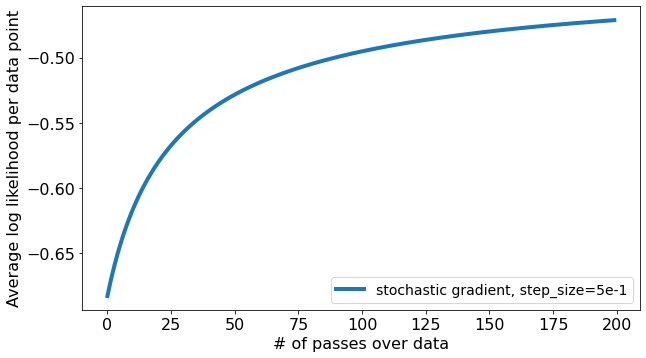

In [ ]:
make_plot(log_likelihood_batch, len_data=len(feature_matrix_train), batch_size=len(feature_matrix_train),
          label='stochastic gradient, step_size=5e-1')

Smoothing the stochastic gradient ascent curve

The plotted line oscillates so much that it is hard to see whether the log likelihood is improving. In our plot, we apply a simple smoothing operation using the parameter smoothing_window. The smoothing is simply a moving average of log likelihood over the last smoothing_window "iterations" of stochastic gradient ascent.

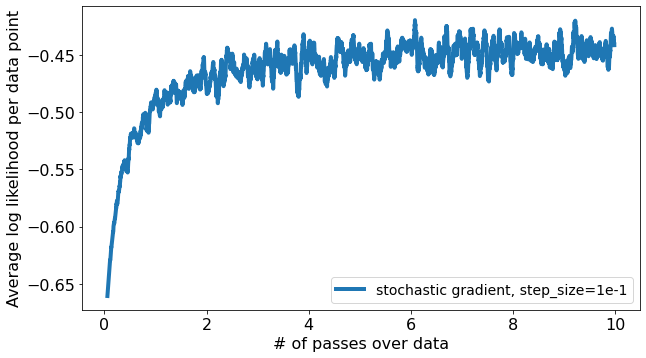

In [ ]:
make_plot(log_likelihood_sgd, len_data=len(feature_matrix_train), batch_size=100,
          smoothing_window=30, label='stochastic gradient, step_size=1e-1')

Stochastic gradient ascent vs batch gradient ascent

In [ ]:
step_size = 1e-1
batch_size = 100
num_passes = 200
num_iterations = num_passes * int(len(feature_matrix_train)/batch_size)

coefficients_sgd, log_likelihood_sgd = logistic_regression_SG(feature_matrix_train, sentiment_train,
                                       initial_coefficients=np.zeros(194),
                                       step_size=1e-1, batch_size=100, max_iter=num_iterations)

Iteration     0: Average log likelihood (of data points in batch [00000:00100]) = -0.68251093
Iteration     1: Average log likelihood (of data points in batch [00100:00200]) = -0.67845294
Iteration     2: Average log likelihood (of data points in batch [00200:00300]) = -0.68207160
Iteration     3: Average log likelihood (of data points in batch [00300:00400]) = -0.67411325
Iteration     4: Average log likelihood (of data points in batch [00400:00500]) = -0.67804438
Iteration     5: Average log likelihood (of data points in batch [00500:00600]) = -0.67712546
Iteration     6: Average log likelihood (of data points in batch [00600:00700]) = -0.66377074
Iteration     7: Average log likelihood (of data points in batch [00700:00800]) = -0.67321231
Iteration     8: Average log likelihood (of data points in batch [00800:00900]) = -0.66923613
Iteration     9: Average log likelihood (of data points in batch [00900:01000]) = -0.67479446
Iteration    10: Average log likelihood (of data points in b

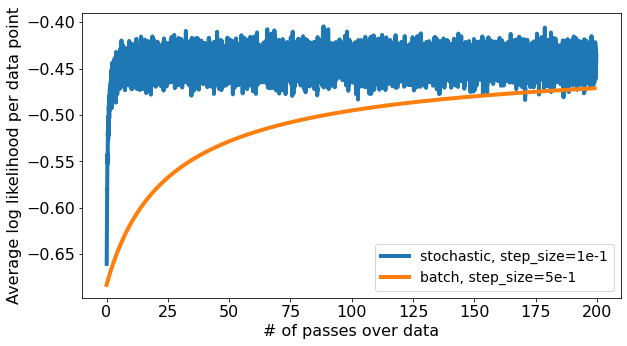

In [ ]:
make_plot(log_likelihood_sgd, len_data=len(feature_matrix_train), batch_size=100,
          smoothing_window=30, label='stochastic, step_size=1e-1')
make_plot(log_likelihood_batch, len_data=len(feature_matrix_train), batch_size=len(feature_matrix_train),
          smoothing_window=1, label='batch, step_size=5e-1')

Explore the effects of step sizes on stochastic gradient ascent

In [ ]:
batch_size = 100
num_passes = 10
num_iterations = num_passes * int(len(feature_matrix_train)/batch_size)

coefficients_sgd = {}
log_likelihood_sgd = {}
for step_size in np.logspace(-4, 2, num=7):
    coefficients_sgd[step_size], log_likelihood_sgd[step_size] = logistic_regression_SG(feature_matrix_train, sentiment_train,
                                       initial_coefficients=np.zeros(194),
                                       step_size=step_size, batch_size=100, max_iter=num_iterations)

Iteration    0: Average log likelihood (of data points in batch [00000:00100]) = -0.69313622
Iteration    1: Average log likelihood (of data points in batch [00100:00200]) = -0.69313170
Iteration    2: Average log likelihood (of data points in batch [00200:00300]) = -0.69313585
Iteration    3: Average log likelihood (of data points in batch [00300:00400]) = -0.69312487
Iteration    4: Average log likelihood (of data points in batch [00400:00500]) = -0.69313157
Iteration    5: Average log likelihood (of data points in batch [00500:00600]) = -0.69313113
Iteration    6: Average log likelihood (of data points in batch [00600:00700]) = -0.69311121
Iteration    7: Average log likelihood (of data points in batch [00700:00800]) = -0.69312692
Iteration    8: Average log likelihood (of data points in batch [00800:00900]) = -0.69312115
Iteration    9: Average log likelihood (of data points in batch [00900:01000]) = -0.69312811
Iteration   10: Average log likelihood (of data points in batch [01000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Iteration  100: Average log likelihood (of data points in batch [10000:10100]) = -10.64501704
Iteration  200: Average log likelihood (of data points in batch [20000:20100]) = -4.03623066


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


Iteration  300: Average log likelihood (of data points in batch [30000:30100]) = -9.16598260
Iteration  400: Average log likelihood (of data points in batch [40000:40100]) = -6.53500674
Iteration  500: Average log likelihood (of data points in batch [02300:02400]) = -5.74111518
Iteration  600: Average log likelihood (of data points in batch [12300:12400]) = -12.39788107
Iteration  700: Average log likelihood (of data points in batch [22300:22400]) = -8.73851801
Iteration  800: Average log likelihood (of data points in batch [32300:32400]) = -9.20873511
Iteration  900: Average log likelihood (of data points in batch [42300:42400]) = -4.19929473
Iteration 1000: Average log likelihood (of data points in batch [04600:04700]) = -3.42817101
Iteration 2000: Average log likelihood (of data points in batch [09200:09300]) = -2.54150278
Iteration 3000: Average log likelihood (of data points in batch [13800:13900]) = -1.83019715
Iteration 4000: Average log likelihood (of data points in batch [1840

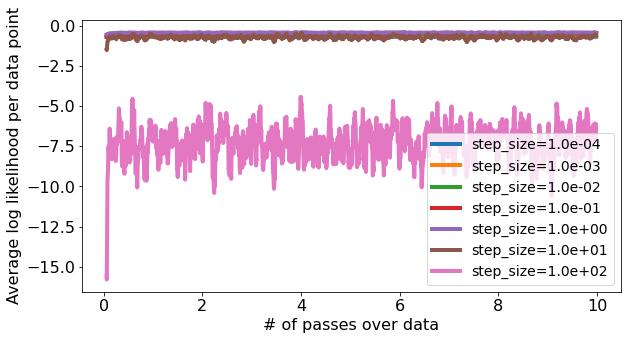

In [ ]:
for step_size in np.logspace(-4, 2, num=7):
    make_plot(log_likelihood_sgd[step_size], len_data=len(train_data), batch_size=100,
              smoothing_window=30, label='step_size=%.1e'%step_size)

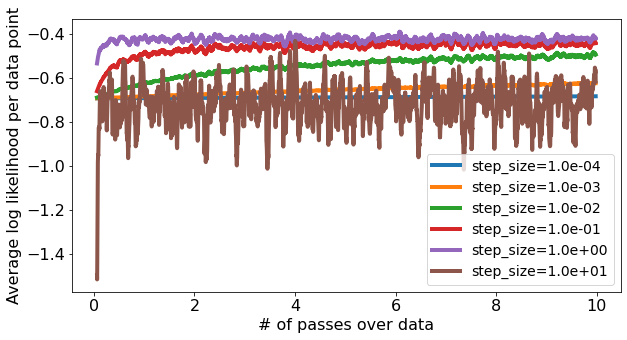

In [ ]:
for step_size in np.logspace(-4, 2, num=7)[0:6]:
    make_plot(log_likelihood_sgd[step_size], len_data=len(train_data), batch_size=100,
              smoothing_window=30, label='step_size=%.1e'%step_size)